# Code for Assignment 1 - Supervised learning (Red Wine data)

This notebook includes analyses for 5 different classification algorithms for the Red Wine dataset

Classification Algorithms: Decision Tree, Neural Network, Boosting, SVM, KNN

# Import Data

In [1]:
import pandas as pd
import timeit
import numpy as np
from sklearn.model_selection import learning_curve,  ShuffleSplit, validation_curve, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://www.kaggle.com/datasets/uciml/pima-indians-Red Wine-database
df = pd.read_csv("./data/winequality-red.csv")

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# turn into a classification problem
df["quality"] = np.where(df["quality"] < df["quality"].mean(), 0, 1)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [74]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [6]:
# Split into train-test sets 

# https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

y = np.ravel(df[["quality"]])
x = df.drop(["quality"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8451)

## Helper Functions

In [75]:
def classifier_metrics(estimator, x_train, x_test, y_train, y_test):
    
    start = timeit.default_timer()
    estimator.fit(x_train, y_train)
    end = timeit.default_timer()
    training_time = end - start
    
    start = timeit.default_timer()    
    y_pred = estimator.predict(x_test)
    end = timeit.default_timer()
    prediction_time = end - start
    
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)

    print("Metrics for Test Set")
    print("-------------------------------------------------------------")
    print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    print("Model Prediction Time (s): "+"{:.5f}".format(prediction_time))
    print("F1 Score:  "+"{:.3f}".format(f1))
    print("Accuracy:  "+"{:.3f}".format(accuracy))

In [8]:
# stolen from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
#        shuffle=True
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# 1. Decision Tree


Hyperparameters:

    - criterion: gini, entropy, logloss
    - max_depth: 1-50

In [9]:
from sklearn.tree import DecisionTreeClassifier

### Initial decision tree accuracy with no tuning

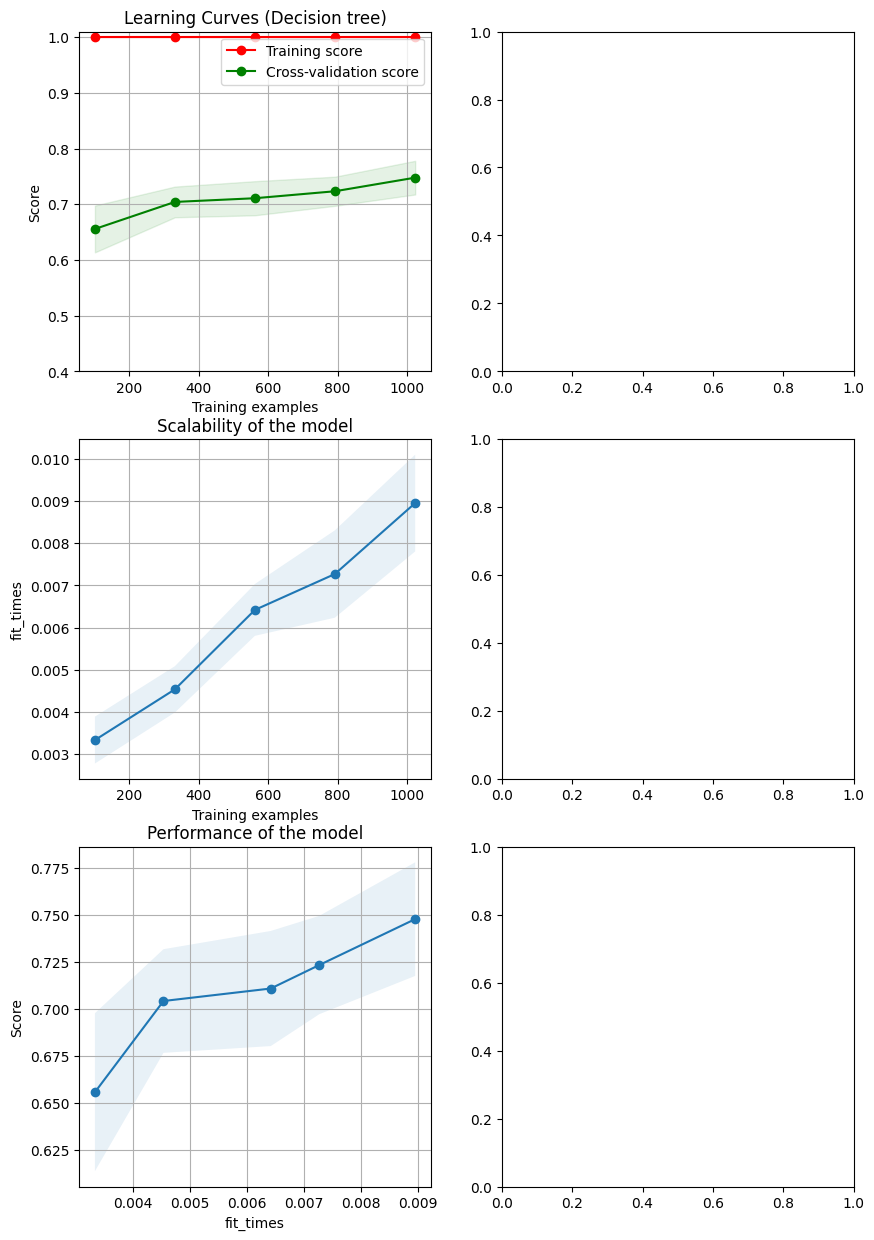

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Decision tree)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = DecisionTreeClassifier(random_state=8451)
plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.4, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [11]:
#decision tree on Red Wine data initial scoring

estimator = DecisionTreeClassifier(random_state=8451)
cv_results = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
print(f"Initial fit time of decision tree is {cv_results['fit_time'].mean()}")
print(f"Initial score time of decision tree is {cv_results['score_time'].mean()}")
print(f"Initial f1 score of decision tree on cross validation {cv_results['test_f1'].mean()}")
print(f"Initial accuracy of decision tree on cross validation {cv_results['test_accuracy'].mean() * 100}%")

Initial fit time of decision tree is 0.007953929901123046
Initial score time of decision tree is 0.0033301830291748045
Initial f1 score of decision tree on cross validation 0.731389584658662
Initial accuracy of decision tree on cross validation 71.30545343137256%


In [12]:
classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.01032
Model Prediction Time (s): 0.00144
F1 Score:  0.78
Accuracy:  0.76


### Hyperparameter tuning

In [80]:
%%time

# validation curves for max_depth for both gini and entropy criterion
max_depth = [i for i in range(1,50)]
min_samples_leaf = [i for i in range(1,50)]

# accuracy scores
acc_gini_max_depth = []
acc_entropy_max_depth = []
acc_gini_min_leaf = []
acc_entropy_min_leaf = []

# f1 scores
f1_gini_max_depth = []
f1_entropy_max_depth = []
f1_gini_min_leaf = []
f1_entropy_min_leaf = []



for i in range(1,50):
    
    # max_depth
    estimator = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=8451)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_gini_max_depth.append(score["test_accuracy"].mean())
    f1_gini_max_depth.append(score["test_f1"].mean())

    estimator = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=8451)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_entropy_max_depth.append(score["test_accuracy"].mean())
    f1_entropy_max_depth.append(score["test_f1"].mean())
    
    # min_samples_leaf
    estimator = DecisionTreeClassifier(criterion="gini", min_samples_leaf=i, random_state=8451)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_gini_min_leaf.append(score["test_accuracy"].mean())
    f1_gini_min_leaf.append(score["test_f1"].mean())

    estimator = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=i, random_state=8451)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_entropy_min_leaf.append(score["test_accuracy"].mean())
    f1_entropy_min_leaf.append(score["test_f1"].mean())
    

scores = pd.DataFrame(
    {
        "acc_gini_max_depth":pd.Series(acc_gini_max_depth),      
        "acc_entropy_max_depth":pd.Series(acc_entropy_max_depth),      
        "f1_gini_max_depth":pd.Series(f1_gini_max_depth),      
        "f1_entropy_max_depth":pd.Series(f1_entropy_max_depth),      
        "acc_gini_min_leaf":pd.Series(acc_gini_min_leaf),      
        "acc_entropy_min_leaf":pd.Series(acc_entropy_min_leaf),      
        "f1_gini_min_leaf":pd.Series(f1_gini_min_leaf),      
        "f1_entropy_min_leaf":pd.Series(f1_entropy_min_leaf),
        "max_depth":pd.Series(max_depth),
        "min_samples_leaf":pd.Series(min_samples_leaf),
    }
)

CPU times: user 8.48 s, sys: 54.1 ms, total: 8.53 s
Wall time: 8.58 s


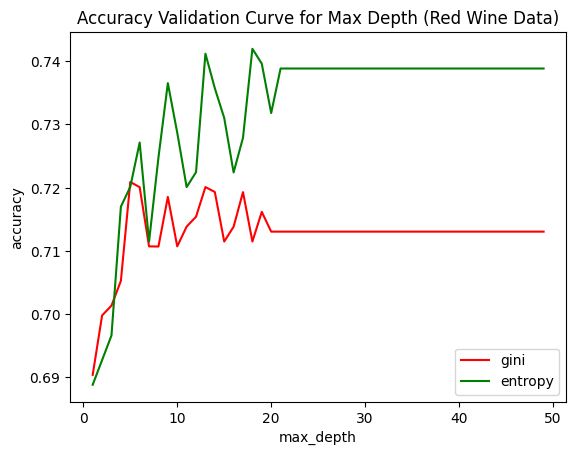

In [14]:
plt.plot("max_depth","acc_gini_max_depth", color="r", data=scores, label="gini")
plt.plot("max_depth","acc_entropy_max_depth", color="g", data=scores, label="entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Accuracy Validation Curve for Max Depth (Red Wine Data)")
plt.legend()

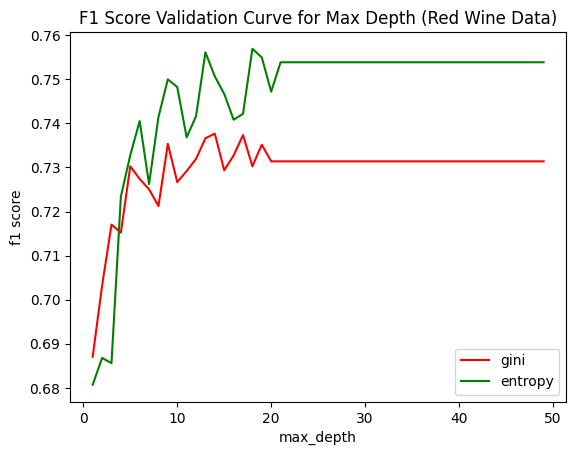

In [15]:
plt.plot("max_depth","f1_gini_max_depth", color="r", data=scores, label="gini")
plt.plot("max_depth","f1_entropy_max_depth", color="g", data=scores, label="entropy")
plt.xlabel("max_depth")
plt.ylabel("f1 score")
plt.title("F1 Score Validation Curve for Max Depth (Red Wine Data)")
plt.legend()

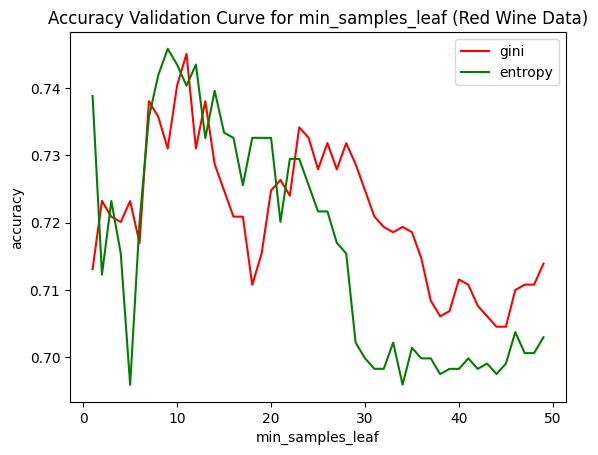

In [16]:
plt.plot("min_samples_leaf","acc_gini_min_leaf", color="r", data=scores, label="gini")
plt.plot("min_samples_leaf","acc_entropy_min_leaf", color="g", data=scores, label="entropy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.title("Accuracy Validation Curve for min_samples_leaf (Red Wine Data)")
plt.legend()

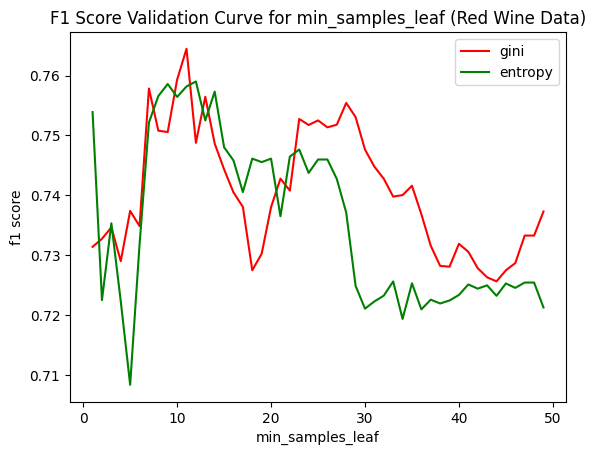

In [81]:
plt.plot("min_samples_leaf","f1_gini_min_leaf", color="r", data=scores, label="gini")
plt.plot("min_samples_leaf","f1_entropy_min_leaf", color="g", data=scores, label="entropy")
plt.xlabel("min_samples_leaf")
plt.ylabel("f1 score")
plt.title("F1 Score Validation Curve for min_samples_leaf (Red Wine Data)")
plt.legend()

In [82]:
%%time

# Grid search for
#    max_depth
#    criterion
params = {'criterion':["gini", "entropy"], 'max_depth':np.arange(1,50), 'min_samples_leaf':np.arange(1,50)}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

decision_tree = GridSearchCV(estimator = DecisionTreeClassifier(random_state=8451), param_grid=params, scoring="f1", cv=cv)
decision_tree.fit(x_train, y_train)
max_depth = int(decision_tree.best_params_["max_depth"])
criterion = decision_tree.best_params_["criterion"]
min_samples_leaf = int(decision_tree.best_params_["min_samples_leaf"])
print(f"Best max_depth from Hyperparameter tuning: {max_depth}")
print(f"Best criterion from Hyperparameter tuning: {criterion}")
print(f"Best min_samples_leaf from Hyperparameter tuning: {min_samples_leaf}")

Best max_depth from Hyperparameter tuning: 7
Best criterion from Hyperparameter tuning: entropy
Best min_samples_leaf from Hyperparameter tuning: 25
CPU times: user 5min 47s, sys: 2.54 s, total: 5min 49s
Wall time: 5min 51s


### Retrain Decision tree with optimal params

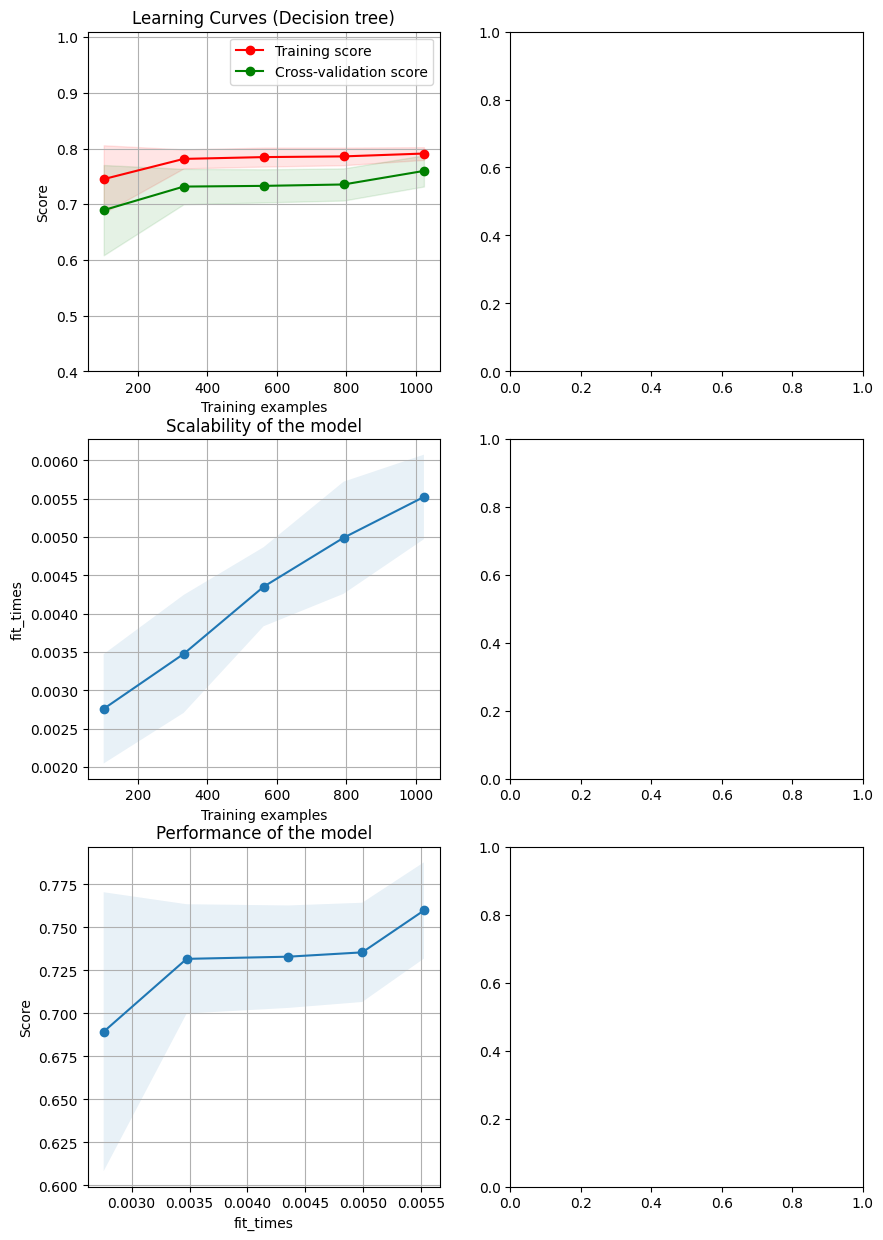

In [83]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Decision tree)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = DecisionTreeClassifier(
    random_state=8451, 
    criterion=criterion, 
    min_samples_leaf=min_samples_leaf, 
    max_depth=max_depth
)

plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.4, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [84]:
estimator = DecisionTreeClassifier(
    random_state=8451, 
    criterion=criterion, 
    min_samples_leaf=min_samples_leaf, 
    max_depth=max_depth
)

classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.02216
Model Prediction Time (s): 0.00258
F1 Score:  0.755
Accuracy:  0.728


# 2. Boosting


Hyperparameters:

    - n_estimators
    - learning_rate

In [22]:
from sklearn.ensemble import AdaBoostClassifier

### Initial Boosting metrics with no tuning

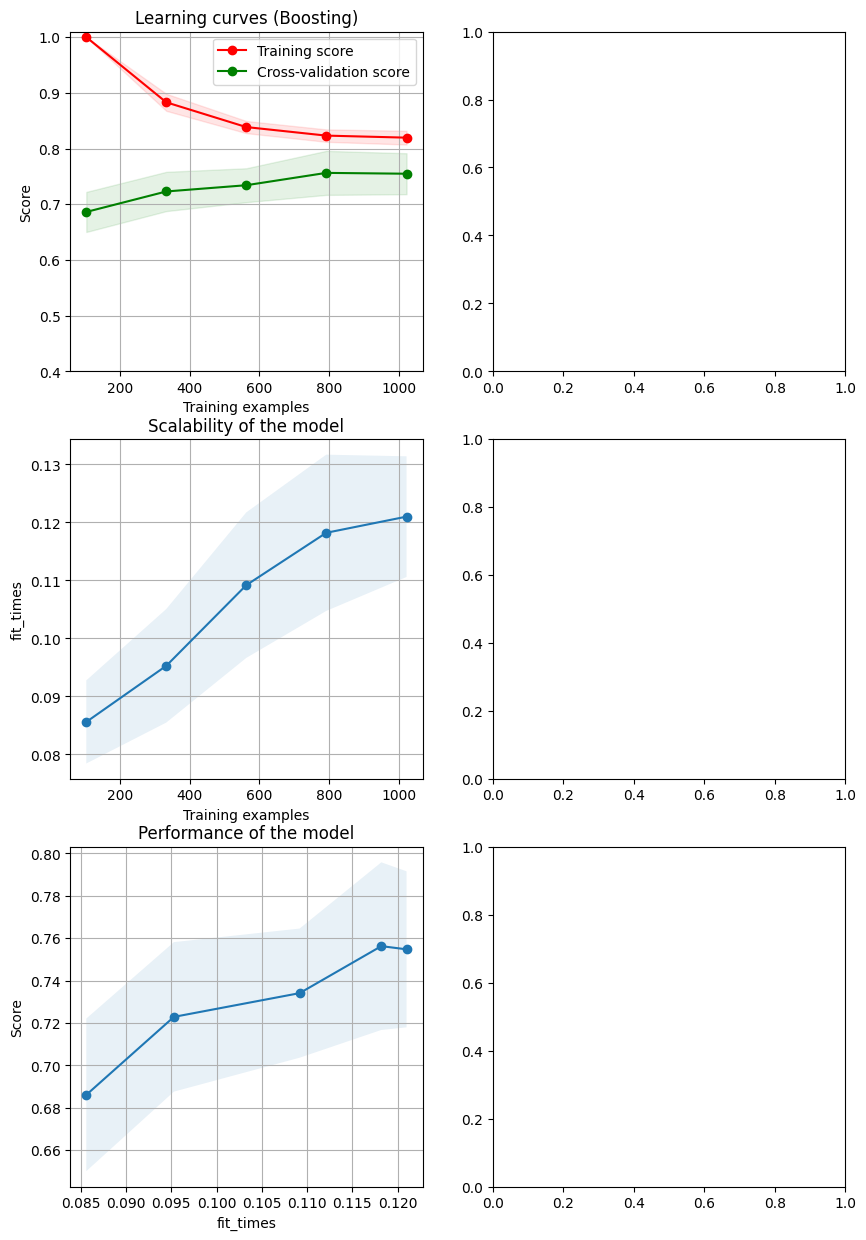

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning curves (Boosting)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = AdaBoostClassifier(random_state=8451)
plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.4, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [24]:
#decision tree on Red Wine data initial scoring

estimator = AdaBoostClassifier(random_state=8451)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)
cv_results = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"], cv=cv)
print(f"Initial fit time of boosting is {cv_results['fit_time'].mean()}")
print(f"Initial score time of boosting is {cv_results['score_time'].mean()}")
print(f"Initial f1 score of boosting on cross validation {cv_results['test_f1'].mean()}")
print(f"Initial accuracy of boosting on cross validation {cv_results['test_accuracy'].mean() * 100}%")

Initial fit time of boosting is 0.10262367725372315
Initial score time of boosting is 0.01232285499572754
Initial f1 score of boosting on cross validation 0.7547639542753107
Initial accuracy of boosting on cross validation 73.8671875%


In [25]:
classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.11410
Model Prediction Time (s): 0.01126
F1 Score:  0.75
Accuracy:  0.73


### Hyperparameter Tuning

In [26]:
%%time

# validation curves for max_depth for both gini and entropy criterion
n_estimators = list(np.arange(5,100,5))
max_depth = [i for i in range(1,5)]
learning_rate = list(np.linspace(.1,2,20))

# accuracy scores
acc_max_depth = []
acc_n_estimators = []
acc_learning_rate = []

# f1 scores
f1_max_depth = []
f1_n_estimators = []
f1_learning_rate = []

for i in max_depth:
    base = DecisionTreeClassifier(max_depth=i, random_state=8451)
    estimator = AdaBoostClassifier(base_estimator=base, random_state=8451)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_max_depth.append(score["test_accuracy"].mean())
    f1_max_depth.append(score["test_f1"].mean())


for i in n_estimators:   
    estimator = AdaBoostClassifier(n_estimators=i, random_state=8451)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_n_estimators.append(score["test_accuracy"].mean())
    f1_n_estimators.append(score["test_f1"].mean())
    
for i in learning_rate:   
    estimator = AdaBoostClassifier(learning_rate=i, random_state=8451)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_learning_rate.append(score["test_accuracy"].mean())
    f1_learning_rate.append(score["test_f1"].mean())

max_depth_df = pd.DataFrame(
    {
        "acc_max_depth":pd.Series(acc_max_depth),      
        "f1_max_depth":pd.Series(f1_max_depth),           
        "max_depth":pd.Series(max_depth),
    }
)

n_estimators_df = pd.DataFrame(
    {
        "acc_n_estimators":pd.Series(acc_n_estimators),      
        "f1_n_estimators":pd.Series(f1_n_estimators),
        "n_estimators":pd.Series(n_estimators),
    }
)

learning_rate_df = pd.DataFrame(
    {
        "acc_learning_rate":pd.Series(acc_learning_rate),      
        "f1_learning_rate":pd.Series(f1_learning_rate),
        "learning_rate":pd.Series(learning_rate),
    }
)


CPU times: user 23.9 s, sys: 162 ms, total: 24.1 s
Wall time: 24.2 s


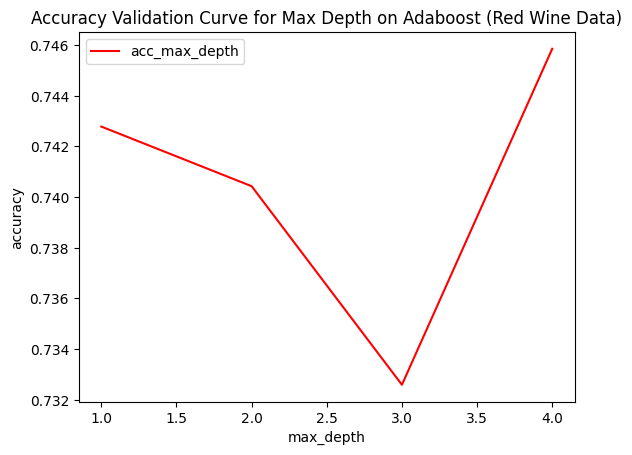

In [27]:
plt.plot("max_depth","acc_max_depth", color="r", data=max_depth_df)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Accuracy Validation Curve for Max Depth on Adaboost (Red Wine Data)")
plt.legend()

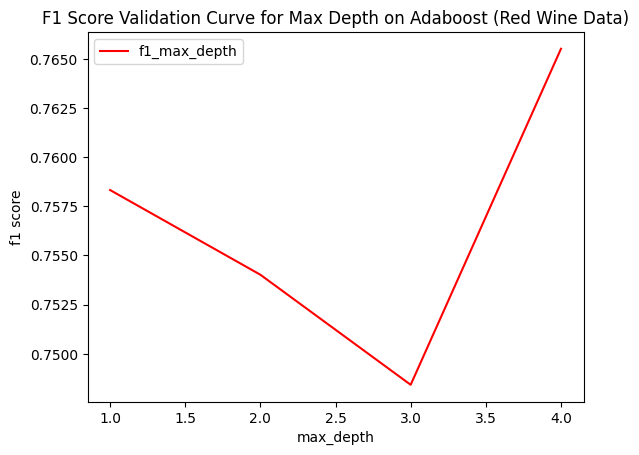

In [28]:
plt.plot("max_depth","f1_max_depth", color="r", data=max_depth_df)
plt.xlabel("max_depth")
plt.ylabel("f1 score")
plt.title("F1 Score Validation Curve for Max Depth on Adaboost (Red Wine Data)")
plt.legend()

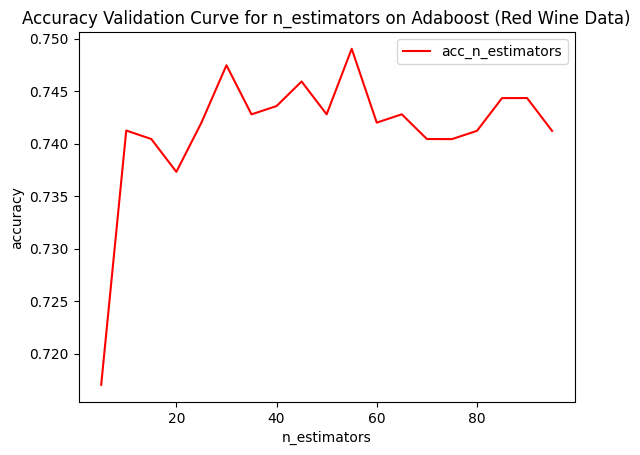

In [29]:
plt.plot("n_estimators","acc_n_estimators", color="r", data=n_estimators_df)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("Accuracy Validation Curve for n_estimators on Adaboost (Red Wine Data)")
plt.legend()

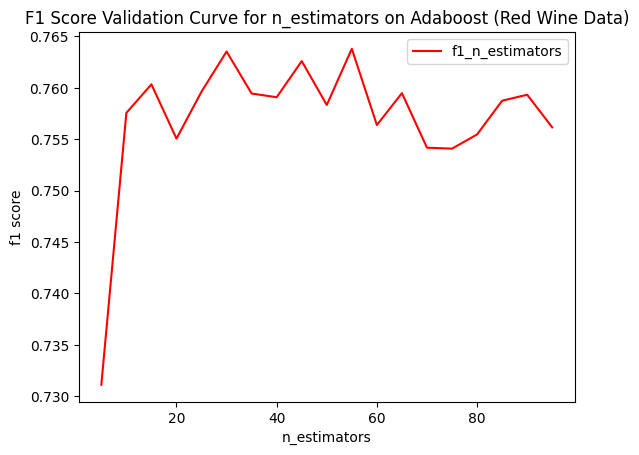

In [30]:
plt.plot("n_estimators","f1_n_estimators", color="r", data=n_estimators_df)
plt.xlabel("n_estimators")
plt.ylabel("f1 score")
plt.title("F1 Score Validation Curve for n_estimators on Adaboost (Red Wine Data)")
plt.legend()

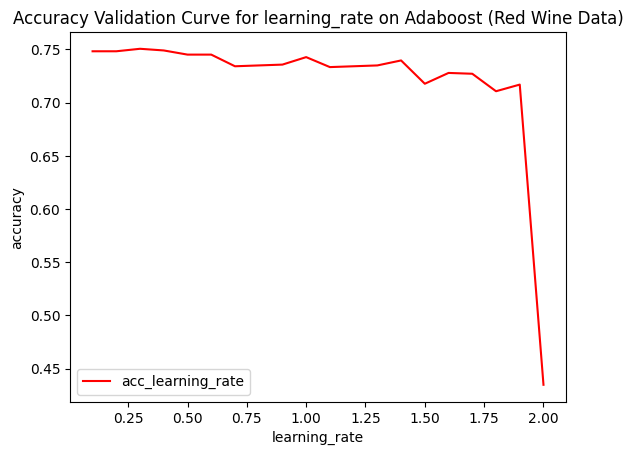

In [31]:
plt.plot("learning_rate","acc_learning_rate", color="r", data=learning_rate_df)
plt.xlabel("learning_rate")
plt.ylabel("accuracy")
plt.title("Accuracy Validation Curve for learning_rate on Adaboost (Red Wine Data)")
plt.legend()

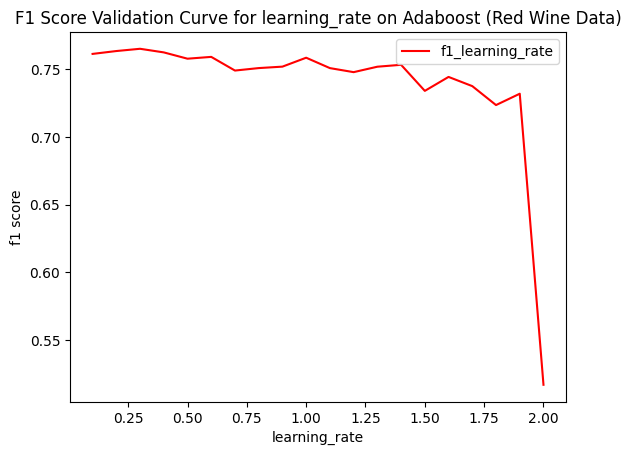

In [32]:
plt.plot("learning_rate","f1_learning_rate", color="r", data=learning_rate_df)
plt.xlabel("learning_rate")
plt.ylabel("f1 score")
plt.title("F1 Score Validation Curve for learning_rate on Adaboost (Red Wine Data)")
plt.legend()

In [98]:
%%time

# Grid search
params = {'base_estimator__max_depth': [1,4], 'learning_rate':list(np.linspace(.1, 1, 10)), 'n_estimators':list(np.arange(5,75,5))}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

base = DecisionTreeClassifier(random_state=8451)
estimator = AdaBoostClassifier(base_estimator=base, random_state=8451)
boosted_tree = GridSearchCV(estimator = estimator, param_grid=params, scoring="f1", cv=cv)
boosted_tree.fit(x_train, y_train)


learning_rate = float(boosted_tree.best_params_["learning_rate"])
n_estimators = int(boosted_tree.best_params_["n_estimators"])
max_depth = int(boosted_tree.best_params_["base_estimator__max_depth"])
print(f"Best learning_rate from Hyperparameter tuning: {learning_rate}")
print(f"Best n_estimators from Hyperparameter tuning: {n_estimators}")
print(f"Best base_estimator__max_depth from Hyperparameter tuning: {max_depth}")

Best learning_rate from Hyperparameter tuning: 0.1
Best n_estimators from Hyperparameter tuning: 60
Best base_estimator__max_depth from Hyperparameter tuning: 4
CPU times: user 5min 12s, sys: 2.55 s, total: 5min 14s
Wall time: 5min 17s


### Retrain Boosted trees with optimal params

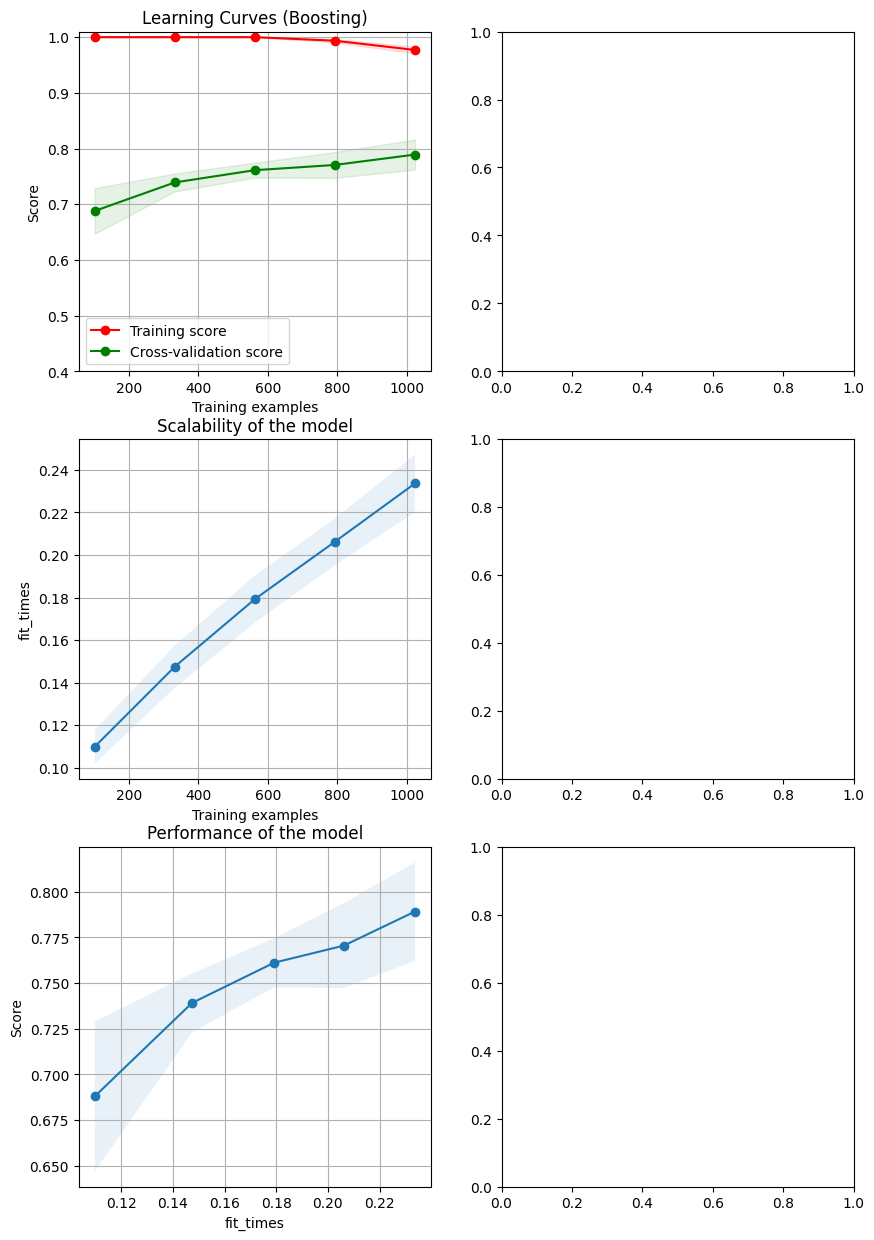

In [97]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Boosting)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

base = DecisionTreeClassifier(max_depth=max_depth, random_state=8451)

estimator = AdaBoostClassifier(
    base_estimator=base,
    random_state=8451, 
    learning_rate=learning_rate, 
    n_estimators=n_estimators, 
)

plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.4, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [91]:
base = DecisionTreeClassifier(max_depth=max_depth, random_state=8451)

estimator = AdaBoostClassifier(
    base_estimator=base,
    random_state=8451, 
    learning_rate=learning_rate, 
    n_estimators=n_estimators, 
)


classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.24409
Model Prediction Time (s): 0.01371
F1 Score:  0.814
Accuracy:  0.794


# 3. Neural Network

Hyperparameters:

    * Hidden layers
    * 

In [39]:
from sklearn.neural_network import MLPClassifier

### Initial NN with no tuning

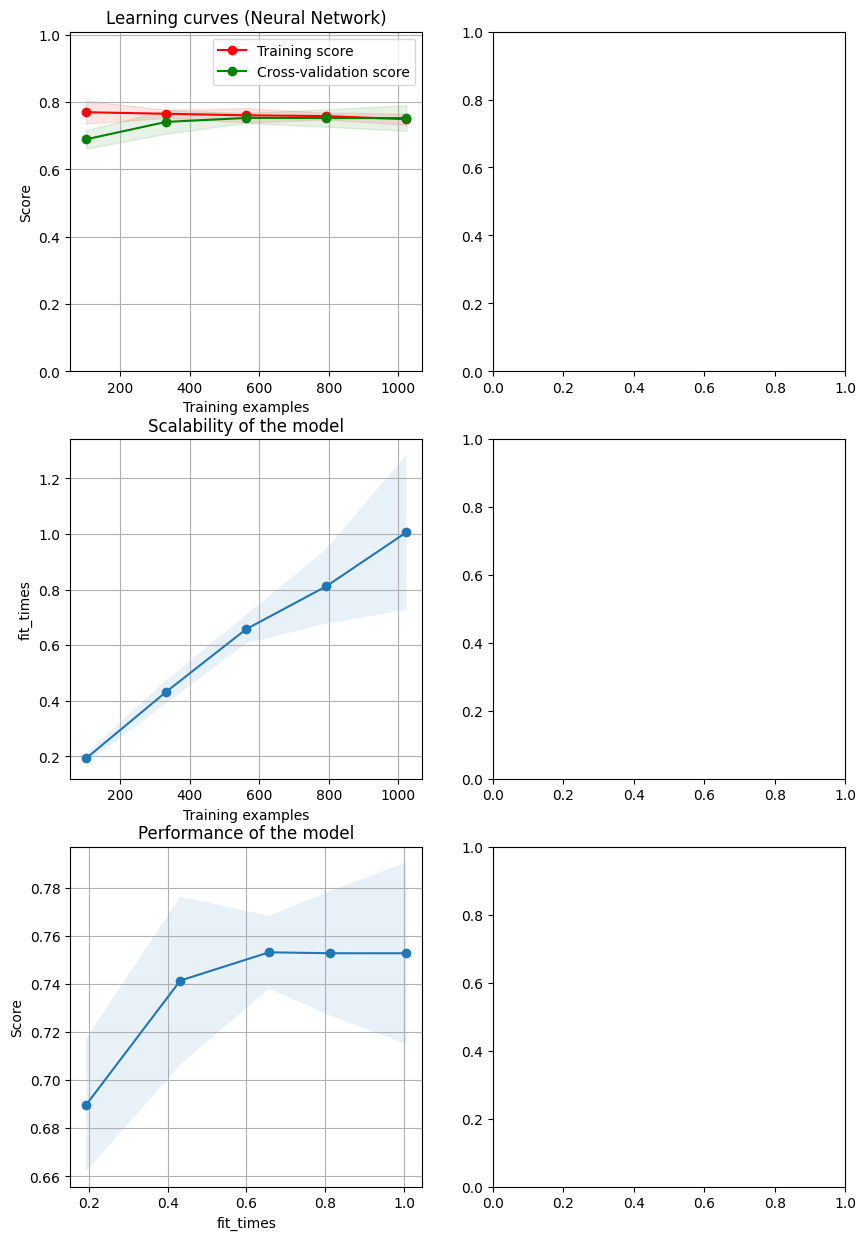

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning curves (Neural Network)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = MLPClassifier(random_state=8451)
plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [41]:
estimator = MLPClassifier(random_state=8451)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)
cv_results = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"], cv=cv)
print(f"Initial fit time of boosting is {cv_results['fit_time'].mean()}")
print(f"Initial score time of boosting is {cv_results['score_time'].mean()}")
print(f"Initial f1 score of boosting on cross validation {cv_results['test_f1'].mean()}")
print(f"Initial accuracy of boosting on cross validation {cv_results['test_accuracy'].mean() * 100}%")

Initial fit time of boosting is 0.6717397689819335
Initial score time of boosting is 0.0033318042755126954
Initial f1 score of boosting on cross validation 0.7528533574230585
Initial accuracy of boosting on cross validation 73.7890625%


In [42]:
estimator = MLPClassifier(random_state=8451)
classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.98873
Model Prediction Time (s): 0.00181
F1 Score:  0.74
Accuracy:  0.72


### HyperParameter Tuning


learning on dataset Red Wine
training: constant learning-rate
Training set score: 0.731822
Training set loss: 0.502153
training: constant with momentum
Training set score: 0.731822
Training set loss: 0.502153
training: constant with Nesterov's momentum
Training set score: 0.731822
Training set loss: 0.502153
training: inv-scaling with momentum
Training set score: 0.731822
Training set loss: 0.502153
training: inv-scaling with Nesterov's momentum
Training set score: 0.731822
Training set loss: 0.502153
training: adam
Training set score: 0.788898
Training set loss: 0.442931
training: sgd
Training set score: 0.756059
Training set loss: 0.512792


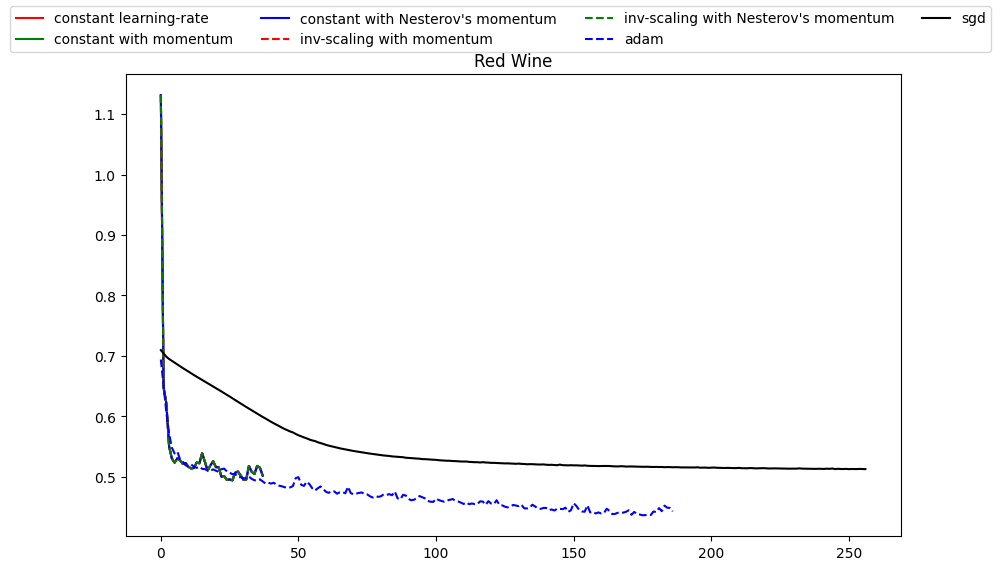

In [46]:
# stolen from https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "adam",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "adam",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "adam",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
#     {
#         "solver": "sgd",
#         "learning_rate": "invscaling",
#         "momentum": 0,
#         "learning_rate_init": 0.2,
#     },
    {
        "solver": "adam",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "adam",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
    {"solver": "sgd", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
#     "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
    "sgd",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1, 1, figsize=(10, 6))
# # load / generate some toy datasets

plot_on_dataset(x_train, y_train, ax=axes, name="Red Wine")

fig.legend(axes.get_lines(), labels, ncol=4, loc="upper center")
plt.show()

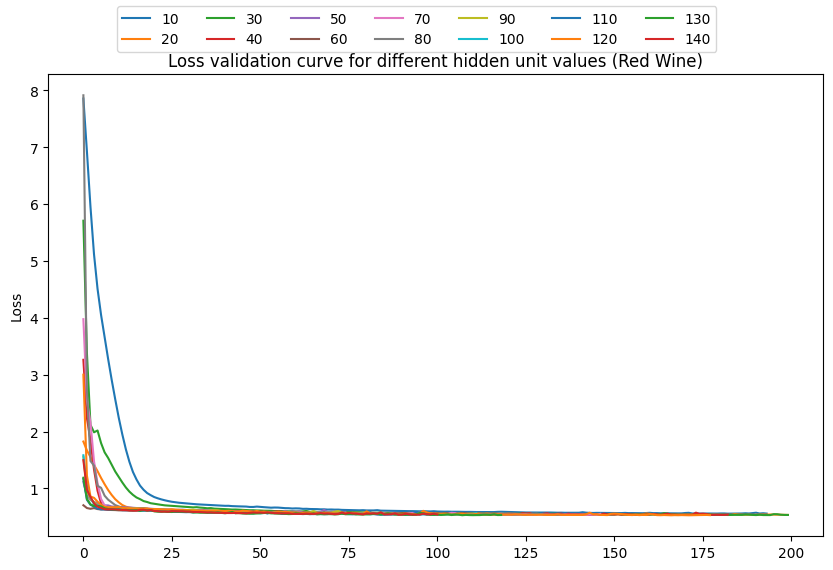

CPU times: user 1min 30s, sys: 15.9 s, total: 1min 46s
Wall time: 34.7 s


In [47]:
%%time

fig, axes = plt.subplots(1, 1, figsize=(10, 6))
hidden_units = np.arange(10,150,10)

# accuracy scores
acc_hidden_units = []


# f1 scores
f1_hidden_units = []

for i in hidden_units:
    estimator = MLPClassifier(random_state=8451, hidden_layer_sizes=(i,), solver="adam", activation='identity')
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_hidden_units.append(score["test_accuracy"].mean())
    f1_hidden_units.append(score["test_f1"].mean())
    
    estimator.fit(x_train, y_train)
    axes.plot(estimator.loss_curve_, label=f'{i} units')
    

hidden_units_df_adam = pd.DataFrame(
    {
        "acc_hidden_units":pd.Series(acc_hidden_units),      
        "f1_hidden_units":pd.Series(f1_hidden_units),           
        "hidden_units":pd.Series(hidden_units),
    }
)
plt.ylabel('Loss')
plt.title("Loss validation curve for different hidden unit values (Red Wine)")
fig.legend(axes.get_lines(), hidden_units, ncol=7, loc="upper center")
plt.show()

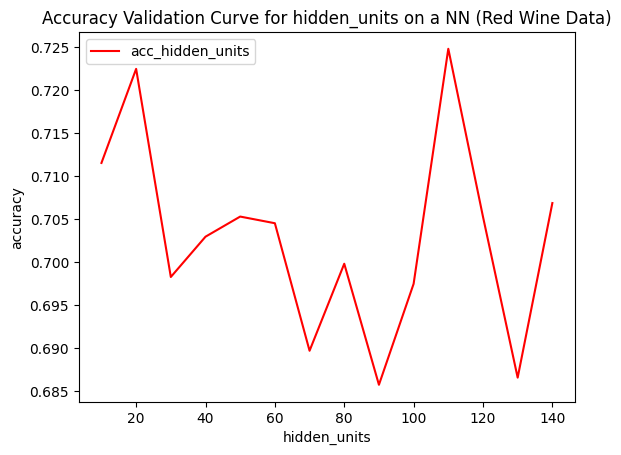

In [48]:
plt.plot("hidden_units","acc_hidden_units", color="r", data=hidden_units_df_adam)
plt.xlabel("hidden_units")
plt.ylabel("accuracy")
plt.title("Accuracy Validation Curve for hidden_units on a NN (Red Wine Data)")
plt.legend()

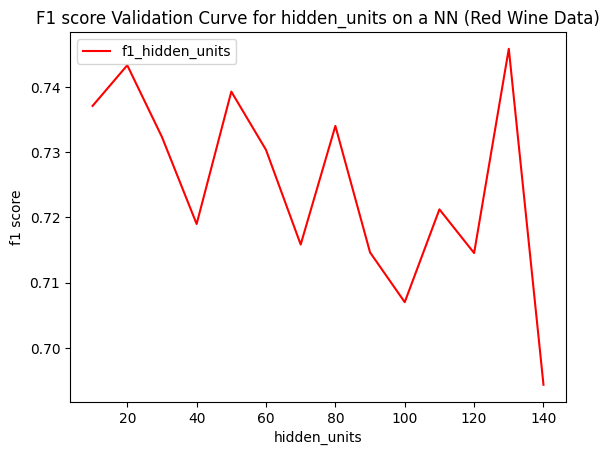

In [49]:
plt.plot("hidden_units","f1_hidden_units", color="r", data=hidden_units_df_adam)
plt.xlabel("hidden_units")
plt.ylabel("f1 score")
plt.title("F1 score Validation Curve for hidden_units on a NN (Red Wine Data)")
plt.legend()

In [50]:
%%time

# Grid search
hidden_units = np.arange(10,150,10)
learning_rates = [.005, 0.01, 0.05, .1]
params = {'learning_rate_init':learning_rates, 'hidden_layer_sizes':hidden_units}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = MLPClassifier(random_state=8451, solver='lbfgs', activation='identity')
grid_search = GridSearchCV(estimator = estimator, param_grid=params, scoring="f1", cv=cv)
grid_search.fit(x_train, y_train)

learning_rate_init = float(grid_search.best_params_["learning_rate_init"])
hidden_layer_sizes = int(grid_search.best_params_["hidden_layer_sizes"])
print(f"Best learning_rate_init from Hyperparameter tuning: {learning_rate_init}")
print(f"Best hidden_layer_sizes from Hyperparameter tuning: {hidden_layer_sizes}")
print(f"Best score from Hyperparameter tuning: {grid_search.best_score_}")

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

Best learning_rate_init from Hyperparameter tuning: 0.005
Best hidden_layer_sizes from Hyperparameter tuning: 10
Best score from Hyperparameter tuning: 0.7790916937023901
CPU times: user 8min 7s, sys: 1min 7s, total: 9min 15s
Wall time: 2min 21s


In [51]:
estimator = MLPClassifier(
    random_state=8451, 
    solver='lbfgs', 
    activation='identity', 
    learning_rate_init=learning_rate_init,
    hidden_layer_sizes=hidden_layer_sizes,
)

classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.15025
Model Prediction Time (s): 0.00144
F1 Score:  0.77
Accuracy:  0.74


### Retrain with optimal params

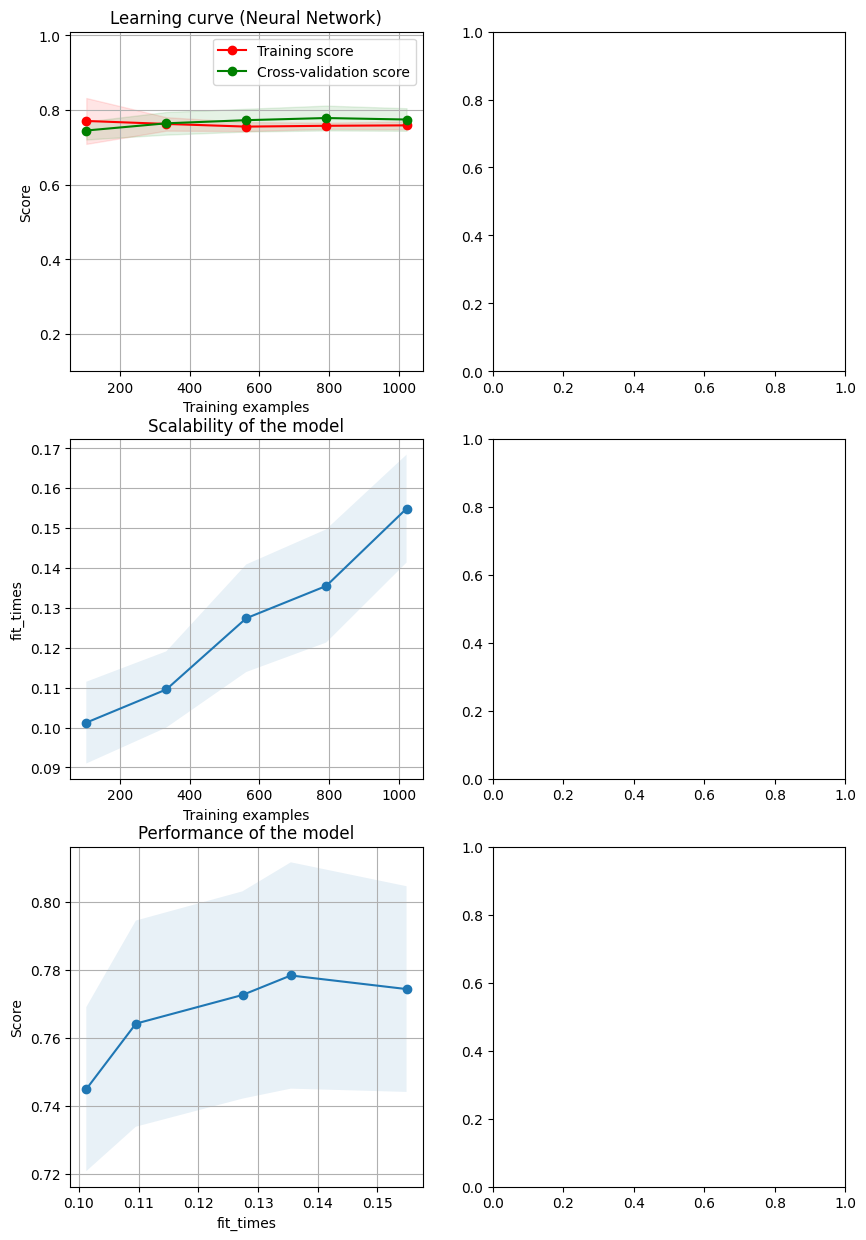

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [99]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning curve (Neural Network)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = MLPClassifier(
    random_state=8451, 
    solver='lbfgs', 
    activation='identity', 
    learning_rate_init=learning_rate_init,
    hidden_layer_sizes=hidden_layer_sizes,
)

plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.1, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

# 4. KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

### Initial performance

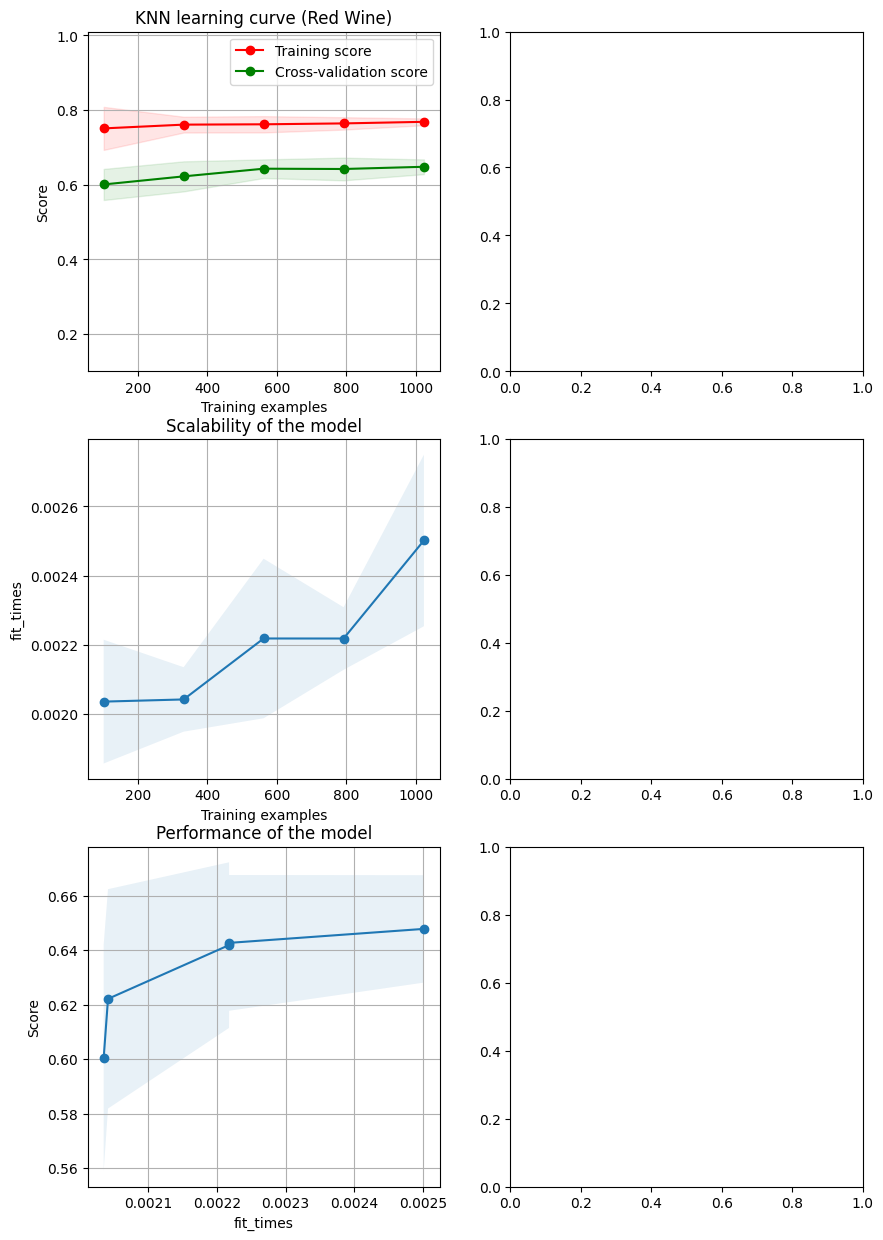

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "KNN learning curve (Red Wine)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = KNeighborsClassifier()
plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.1, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [55]:
# initial scoring

estimator = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)
cv_results = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"], cv=cv)
print(f"Initial fit time is {cv_results['fit_time'].mean()}")
print(f"Initial score time is {cv_results['score_time'].mean()}")
print(f"Initial f1 score on cross validation {cv_results['test_f1'].mean()}")
print(f"Initial accuracy on cross validation {cv_results['test_accuracy'].mean() * 100}%")

Initial fit time is 0.002069854736328125
Initial score time is 0.011900615692138673
Initial f1 score on cross validation 0.647841945194868
Initial accuracy on cross validation 62.8515625%


In [56]:
# initial performance on test set
estimator = KNeighborsClassifier()

classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.00373
Model Prediction Time (s): 0.01324
F1 Score:  0.69
Accuracy:  0.67


### Hyperparameter Tuning

In [57]:
%%time

# validation curves for max_depth for both gini and entropy criterion
n_neighbors = list(np.arange(3,25,2))

# accuracy scores
acc_n_neighbors = []

# f1 scores
f1_n_neighbors = []

for i in n_neighbors:
    estimator = KNeighborsClassifier(n_neighbors=i)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_n_neighbors.append(score["test_accuracy"].mean())
    f1_n_neighbors.append(score["test_f1"].mean())

knn_df = pd.DataFrame(
    {
        "acc_n_neighbors":pd.Series(acc_n_neighbors),      
        "f1_n_neighbors":pd.Series(f1_n_neighbors),
        "n_neighbors":pd.Series(n_neighbors),
    }
)


CPU times: user 765 ms, sys: 7.15 ms, total: 772 ms
Wall time: 768 ms


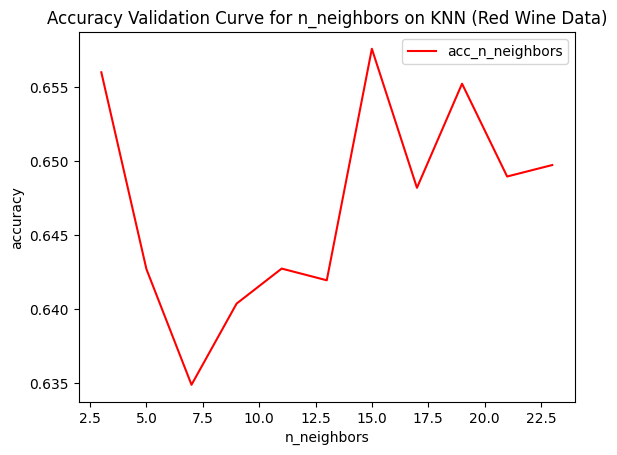

In [58]:
plt.plot("n_neighbors","acc_n_neighbors", color="r", data=knn_df)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.title("Accuracy Validation Curve for n_neighbors on KNN (Red Wine Data)")
plt.legend()

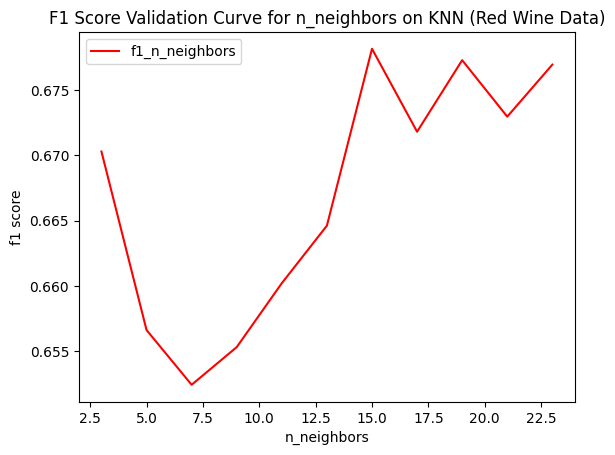

In [59]:
plt.plot("n_neighbors","f1_n_neighbors", color="r", data=knn_df)
plt.xlabel("n_neighbors")
plt.ylabel("f1 score")
plt.title("F1 Score Validation Curve for n_neighbors on KNN (Red Wine Data)")
plt.legend()

In [60]:
%%time

# Grid search
params = {'metric' : ['minkowski','euclidean'], 'n_neighbors':list(np.arange(1,30,1))}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = estimator, param_grid=params, scoring="f1", cv=cv)
grid_search.fit(x_train, y_train)


metric = str(grid_search.best_params_["metric"])
n_neighbors = int(grid_search.best_params_["n_neighbors"])
print(f"Best metric from Hyperparameter tuning: {metric}")
print(f"Best n_neighbors from Hyperparameter tuning: {n_neighbors}")

Best metric from Hyperparameter tuning: minkowski
Best n_neighbors from Hyperparameter tuning: 1
CPU times: user 7.78 s, sys: 38.1 ms, total: 7.82 s
Wall time: 7.87 s


### Retrain with optimal parameters

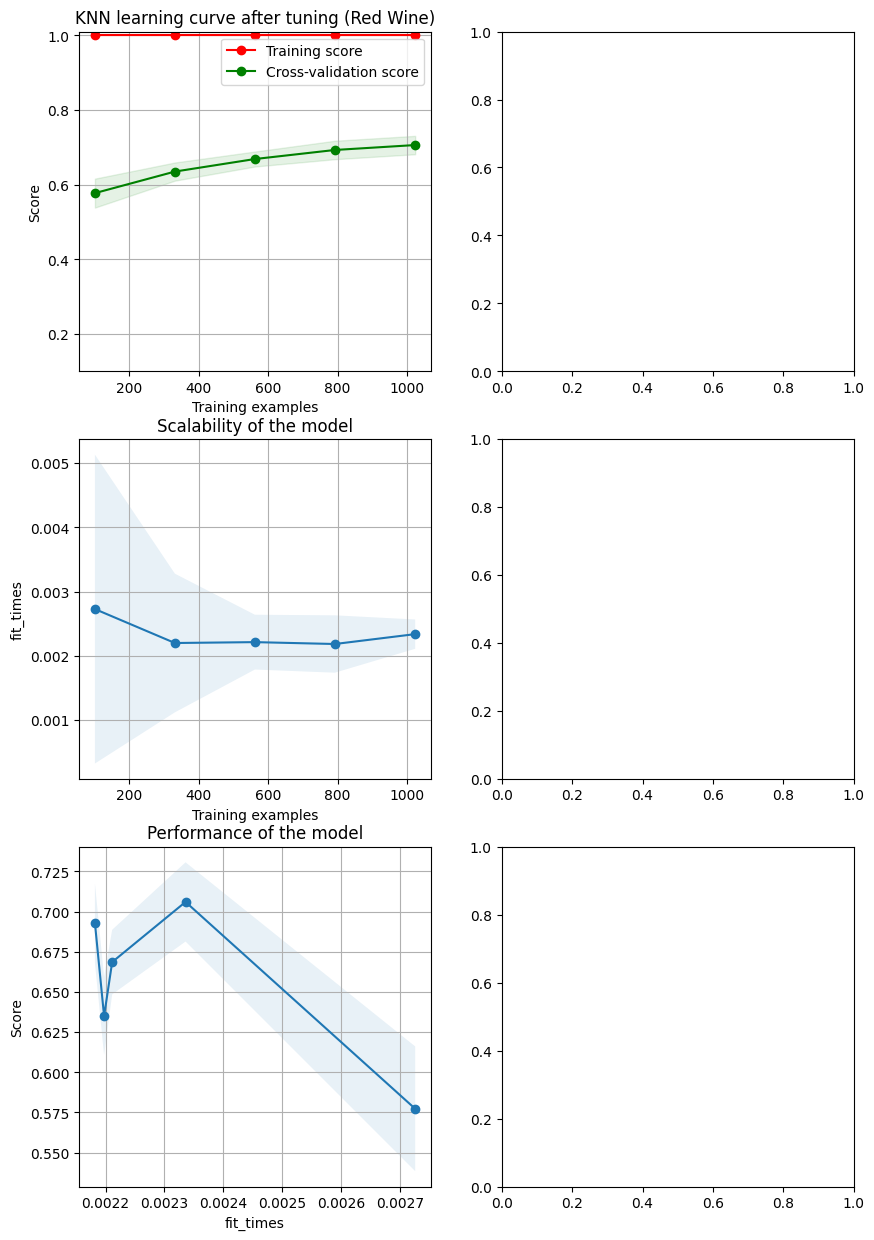

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "KNN learning curve after tuning (Red Wine)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors)
plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.1, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [62]:
estimator = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors)

classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.00379
Model Prediction Time (s): 0.01424
F1 Score:  0.73
Accuracy:  0.70


# 5. SVM

Hyperparameters

    - Kernel
    - Gamma

In [63]:
from sklearn.svm import SVC

### Initial SVM with no tuning

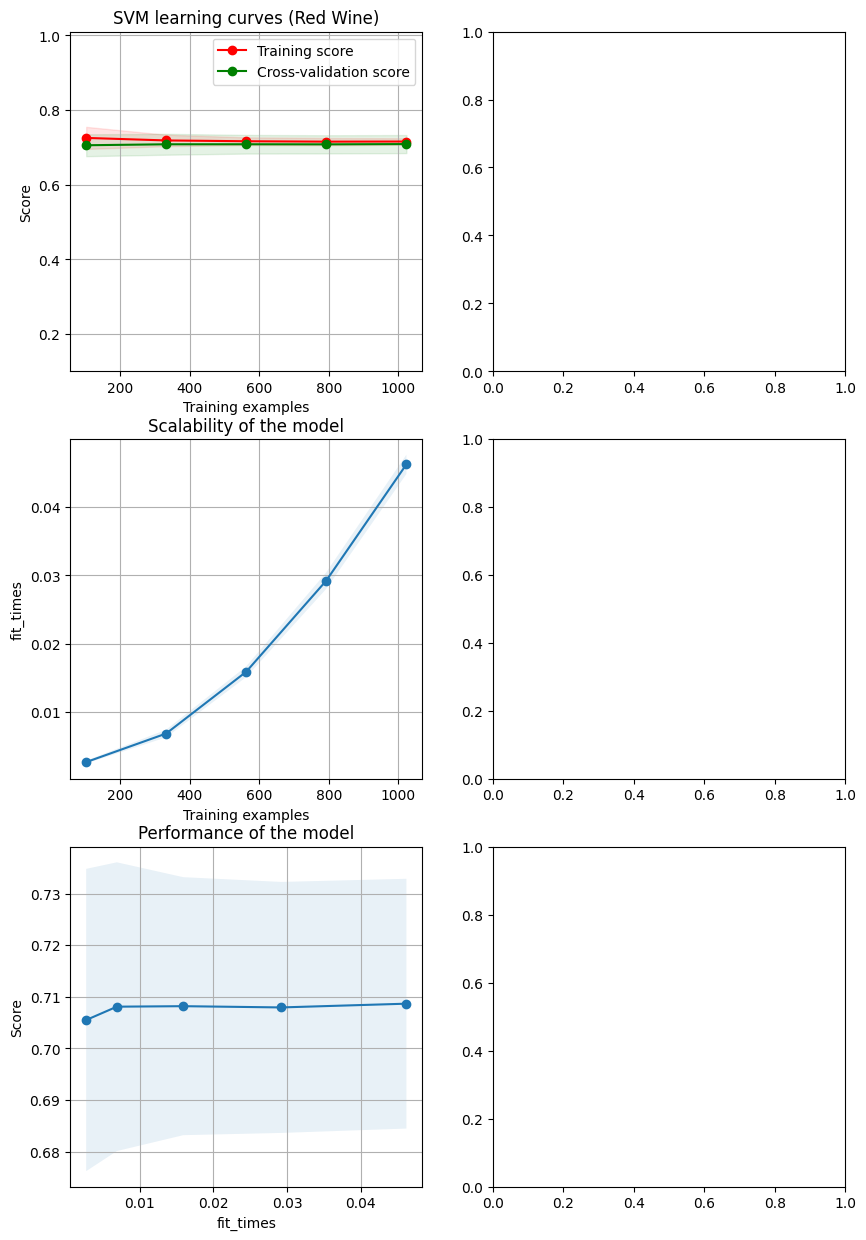

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "SVM learning curves (Red Wine)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = SVC(random_state=8451)
plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.1, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [65]:
# initial scoring

estimator = SVC(random_state=8451)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)
cv_results = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"], cv=cv)
print(f"Initial fit time of boosting is {cv_results['fit_time'].mean()}")
print(f"Initial score time of boosting is {cv_results['score_time'].mean()}")
print(f"Initial f1 score of boosting on cross validation {cv_results['test_f1'].mean()}")
print(f"Initial accuracy of boosting on cross validation {cv_results['test_accuracy'].mean() * 100}%")

Initial fit time of boosting is 0.04227004051208496
Initial score time of boosting is 0.023829555511474608
Initial f1 score of boosting on cross validation 0.7086658912551497
Initial accuracy of boosting on cross validation 62.265625%


In [66]:
# initial performance on test set
estimator = SVC(random_state=8451)
classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   0.06450
Model Prediction Time (s): 0.03464
F1 Score:  0.73
Accuracy:  0.65


### Hyperparameter Tuning

In [67]:
%%time

# validation curves for max_depth for both gini and entropy criterion
n_estimators = list(np.arange(5,100,5))
max_depth = [i for i in range(1,5)]
learning_rate = list(np.linspace(.1,2,20))

# accuracy scores
acc_kernel = []
acc_n_estimators = []
acc_learning_rate = []

# f1 scores
f1_kernel = []
f1_n_estimators = []
f1_learning_rate = []

kernel_functions = ['linear','rbf','sigmoid']
x = ['linear','rbf','sigmoid', 'poly_2','poly_3','poly_4','poly_5']

for i in kernel_functions:
    estimator = SVC(kernel=i, random_state=8451)
    score = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=["f1", "accuracy"])
    acc_kernel.append(score["test_accuracy"].mean())
    f1_kernel.append(score["test_f1"].mean())


for i in range(2,6):   
    estimator = SVC(kernel="poly", degree=i, random_state=8451)
    acc_kernel.append(score["test_accuracy"].mean())
    f1_kernel.append(score["test_f1"].mean())
    

kernel_df = pd.DataFrame(
    {
        "acc_kernel":pd.Series(acc_kernel),      
        "f1_kernel":pd.Series(f1_kernel),
        "kernel":pd.Series(x),
    }
)


CPU times: user 3 s, sys: 8.28 ms, total: 3.01 s
Wall time: 3.01 s


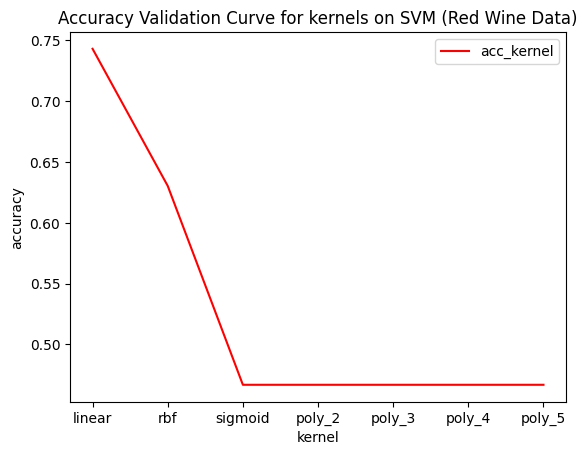

In [68]:
plt.plot("kernel","acc_kernel", color="r", data=kernel_df)
plt.xlabel("kernel")
plt.ylabel("accuracy")
plt.title("Accuracy Validation Curve for kernels on SVM (Red Wine Data)")
plt.legend()

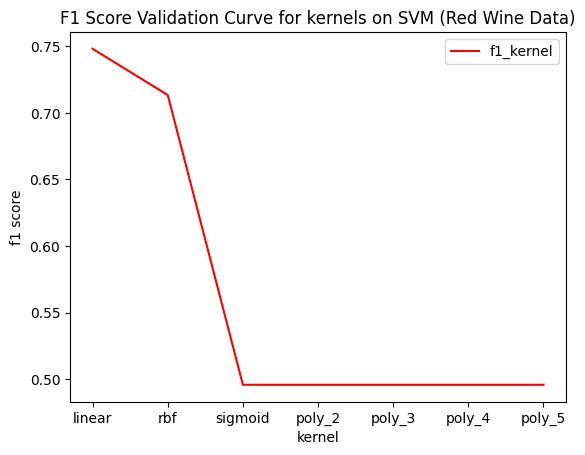

In [69]:
plt.plot("kernel","f1_kernel", color="r", data=kernel_df)
plt.xlabel("kernel")
plt.ylabel("f1 score")
plt.title("F1 Score Validation Curve for kernels on SVM (Red Wine Data)")
plt.legend()

In [70]:
%%time

# Grid search
gamma_range = [0.0001, 0.001, 0.1, 1]
C_range = [0.1, 1, 10]

params = {'gamma':gamma_range, "C":C_range}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = SVC(random_state=8451, kernel="linear")
grid_search = GridSearchCV(estimator = estimator, param_grid=params, scoring="f1", cv=None)
grid_search.fit(x_train, y_train)

gamma = float(grid_search.best_params_["gamma"])
C = int(grid_search.best_params_["C"])
print(f"Best gamma from Hyperparameter tuning: {gamma}")
print(f"Best C from Hyperparameter tuning: {C}")
print(f"Best score from Hyperparameter tuning: {grid_search.best_score_}")

Best gamma from Hyperparameter tuning: 0.0001
Best C from Hyperparameter tuning: 10
Best score from Hyperparameter tuning: 0.7525906996292513
CPU times: user 1min 42s, sys: 96.5 ms, total: 1min 42s
Wall time: 1min 42s


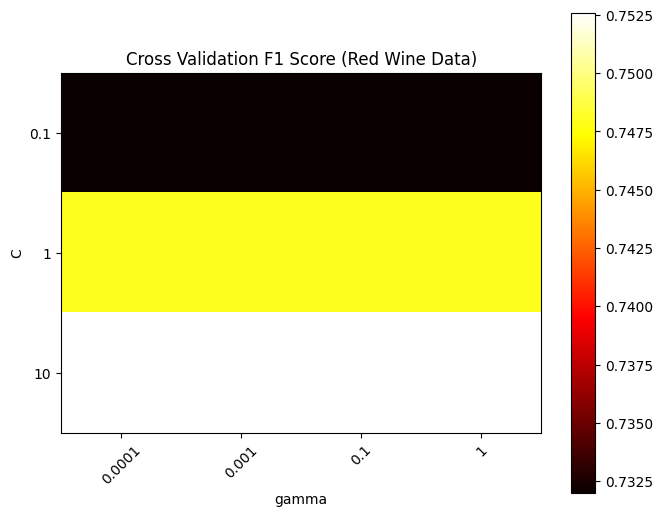

In [71]:
# Stolen from https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
from matplotlib.colors import Normalize


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# heat map for C and gamma

scores = grid_search.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
#     norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Cross Validation F1 Score (Red Wine Data)")
plt.show()

### Retrain with optimal parameters

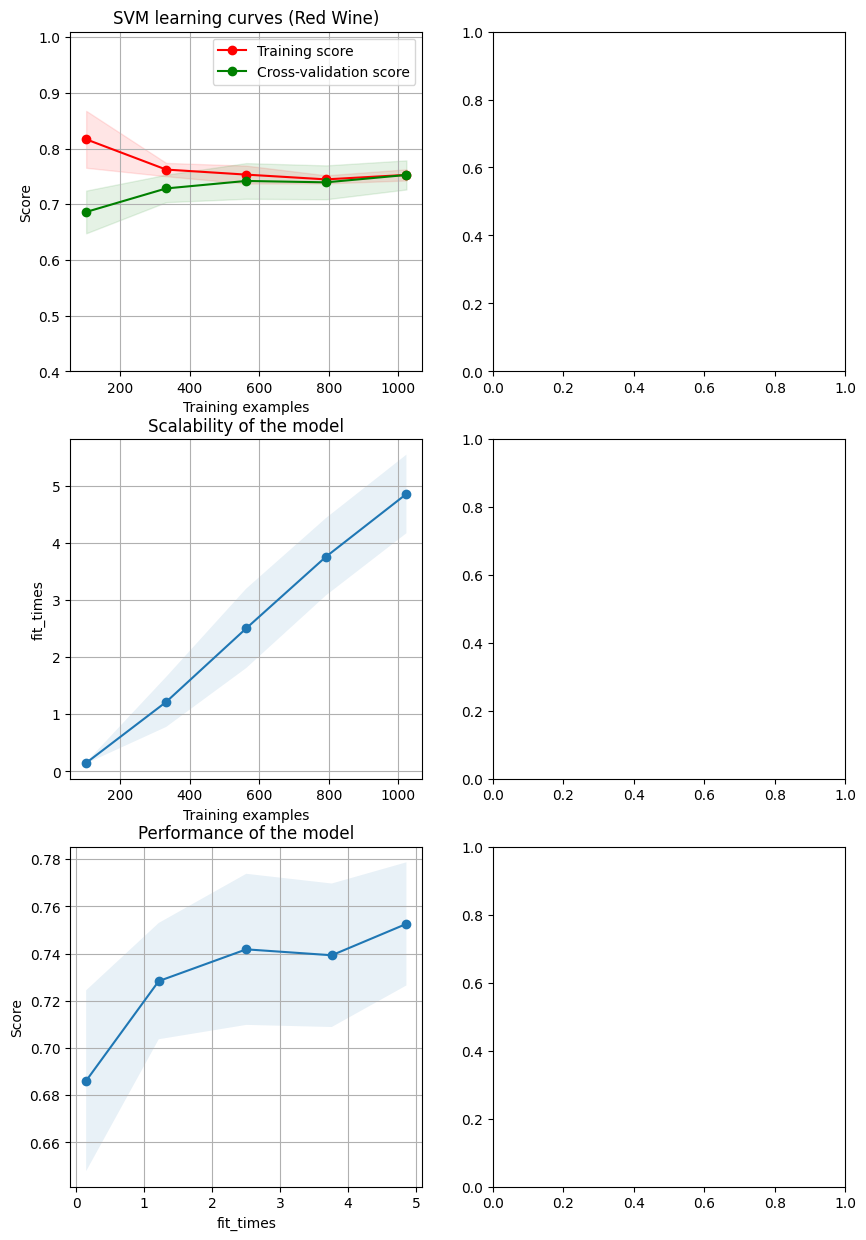

In [72]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "SVM learning curves (Red Wine)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8451)

estimator = SVC(
    random_state=8451,  
    gamma=gamma, 
    C=C,
    kernel="linear"
)

plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.4, 1.01),
    cv=None,
    n_jobs=4,
    scoring="f1",
)

plt.show()

In [100]:
estimator = SVC(
    random_state=8451,  
    gamma=gamma, 
    C=C,
    kernel="linear"
)

classifier_metrics(
    estimator=estimator,               
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Metrics for Test Set
-------------------------------------------------------------
Model Training Time (s):   5.06842
Model Prediction Time (s): 0.00850
F1 Score:  0.753
Accuracy:  0.738
